In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

In [154]:
def load_adc_data(filename):
    adc1 = []
    adc2 = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                try:
                    val1 = int(parts[0])
                    val2 = int(parts[1])
                    adc1.append(val1)
                    adc2.append(val2)
                except ValueError:
                    continue  # skip malformed lines
    return adc1, adc2

def plot_time(plotting_list, label=["Plot 1", "Plot 2", "Plot 3", "Plot 4", "Plot 5"], title="ADC Data Plot"):
    # Plotting
    marker_list = ['o', 'x', 's', '^', 'D']
    colors = ['b', 'r', 'g', 'c', 'm']
    plt.figure(figsize=(12, 6))
    for i, data in enumerate(plotting_list):
        plt.plot(data, label=label[i], marker=marker_list[i], color=colors[i], linestyle='-', markersize=1)
    # plt.plot(x_values, voltage_value, marker='x', linestyle='-', markersize=2, color='red')
    # plt.title("ADC Data Plot")
    plt.xlabel("Sample Number")
    plt.ylabel("Normalized ADC Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [155]:
def hysterisis(data, middle_threshold, deviation):
    """Apply a moving average filter to the data."""
    lower_threshold = middle_threshold - deviation
    upper_threshold = middle_threshold + deviation
    hysterisis_data = []
    current_state = "LOW" if data[0] < middle_threshold else "HIGH"
    hysterisis_data.append(0 if current_state == "LOW" else 1)
    for value in data:
        if current_state == "LOW":
            if value > upper_threshold:
                hysterisis_data.append(1)
                current_state = "HIGH"
            else:
                hysterisis_data.append(0)
        else:  # current_state == "HIGH"
            if value < lower_threshold:
                hysterisis_data.append(0)
                current_state = "LOW"
            else:
                hysterisis_data.append(1)
    return hysterisis_data

In [156]:
def comparator(data, middle_threshold):
    """Apply hysteresis to adc2 data."""
    comparator_data = []
    for value in data:
        if value < middle_threshold:
            comparator_data.append(0)
        else:
            comparator_data.append(1)
    return comparator_data

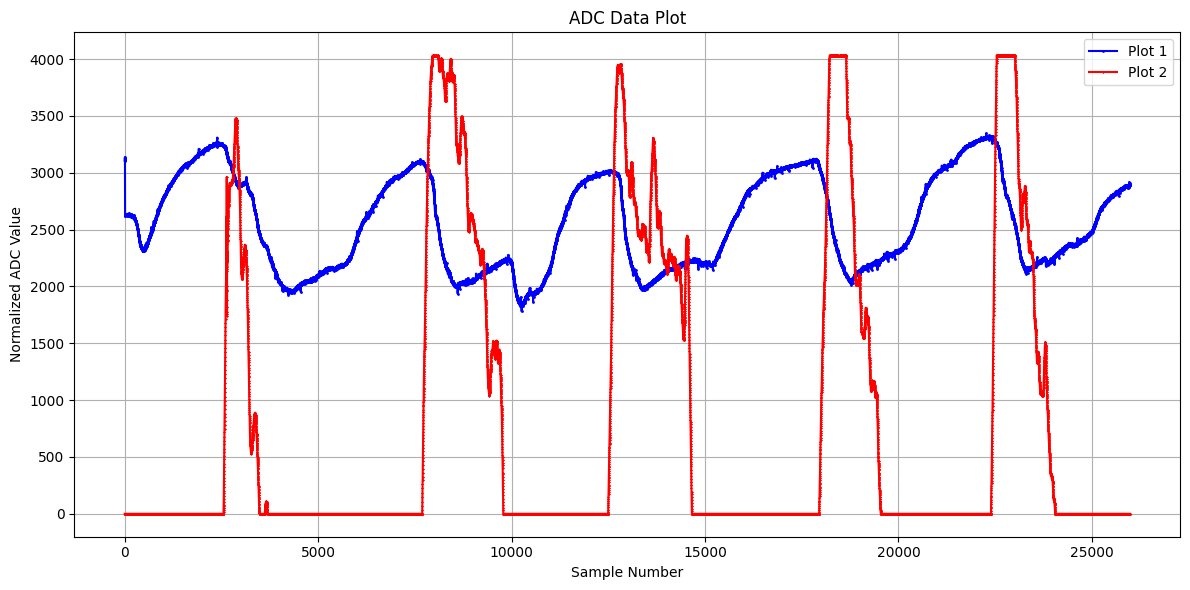

In [157]:
normal_path = './data/normal/5/adc_normal5_2.data'
sport_path = './data/sport/adc_sport10_4.data'
demo_path = "./eval1.data"
adc1, adc2 = load_adc_data(normal_path)
plot_time([adc1, adc2])

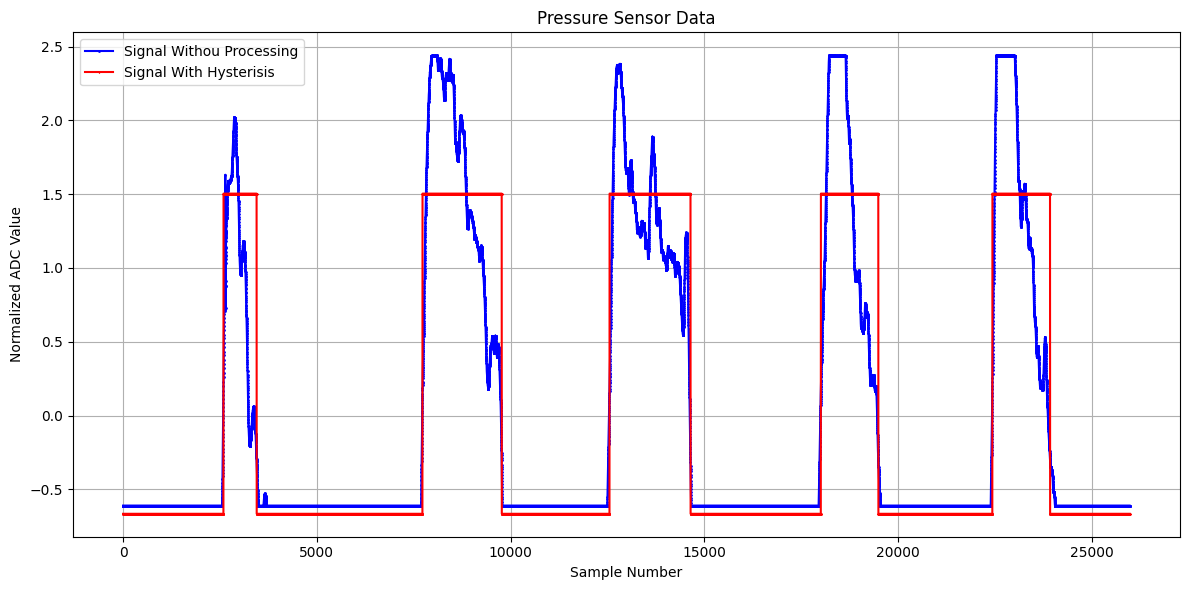

In [158]:
normalize_adc2 = (adc2 - np.mean(adc2))/ np.std(adc2)
hysterisis_adc2 = hysterisis(adc2, middle_threshold=700, deviation=300)
comparator_adc2 = comparator(adc2, middle_threshold=700)
normalize_comparator_adc2 = (comparator_adc2 - np.mean(comparator_adc2)) / np.std(comparator_adc2)
normalize_hysterisis_adc2 = (hysterisis_adc2 - np.mean(hysterisis_adc2)) / np.std(hysterisis_adc2)
# print("Hysterisis ADC2:", hysterisis_adc2)
plot_time([normalize_adc2, normalize_hysterisis_adc2], ["Signal Withou Processing", "Signal With Hysterisis"], title="Pressure Sensor Data")

Peaks found at indices: [ 3017  8748 13599 18749 23179]


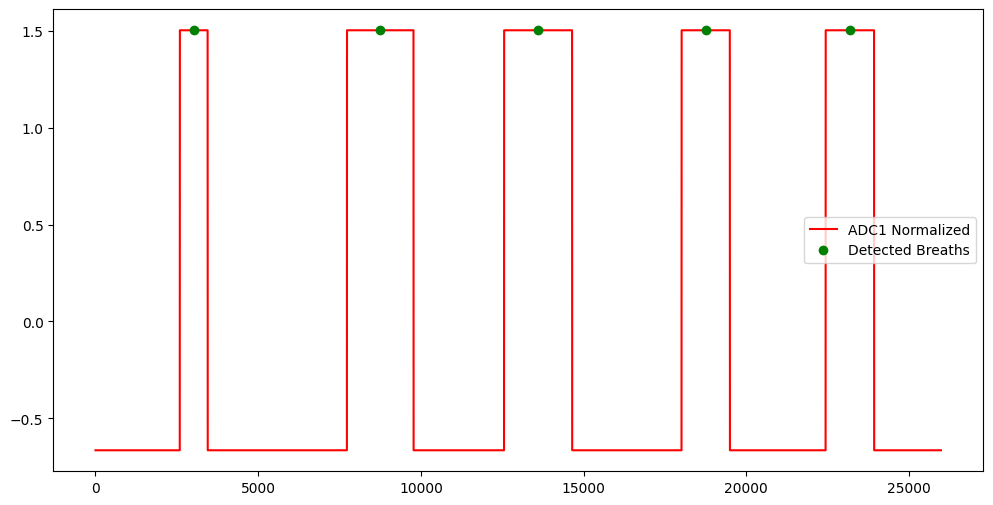

In [159]:
from scipy.signal import find_peaks
peaks_belly1, props1 = find_peaks(normalize_hysterisis_adc2, prominence=0.1, distance=1000, plateau_size=1)
plateau_mids1 = [int((l + r) / 2) for l, r in zip(props1["left_edges"], props1["right_edges"])]
print("Peaks found at indices:", peaks_belly1)
plt.figure(figsize=(12, 6))
plt.plot(normalize_hysterisis_adc2, label='ADC1 Normalized', color='red')
plt.plot(plateau_mids1, normalize_hysterisis_adc2[plateau_mids1], 'go', label='Detected Breaths')
plt.legend()